<a href="https://colab.research.google.com/github/asjaradja/CompMethBioPhys/blob/main/Professor%20Class%20notes/Topic_3_ReactionDiffusionEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To start, please make your own copy of this file by clicking File -> Save as in Drive from the menu bar above

# Pattern formation

One of the characteristics of biological systems is their ability to produce and sustain spatial and spatio-temporal pattern.
Much experimental and theoretical work in biophysics (specifically pattern formation) involves figuring out the underlying **mechanisms** responsible for this patterning.



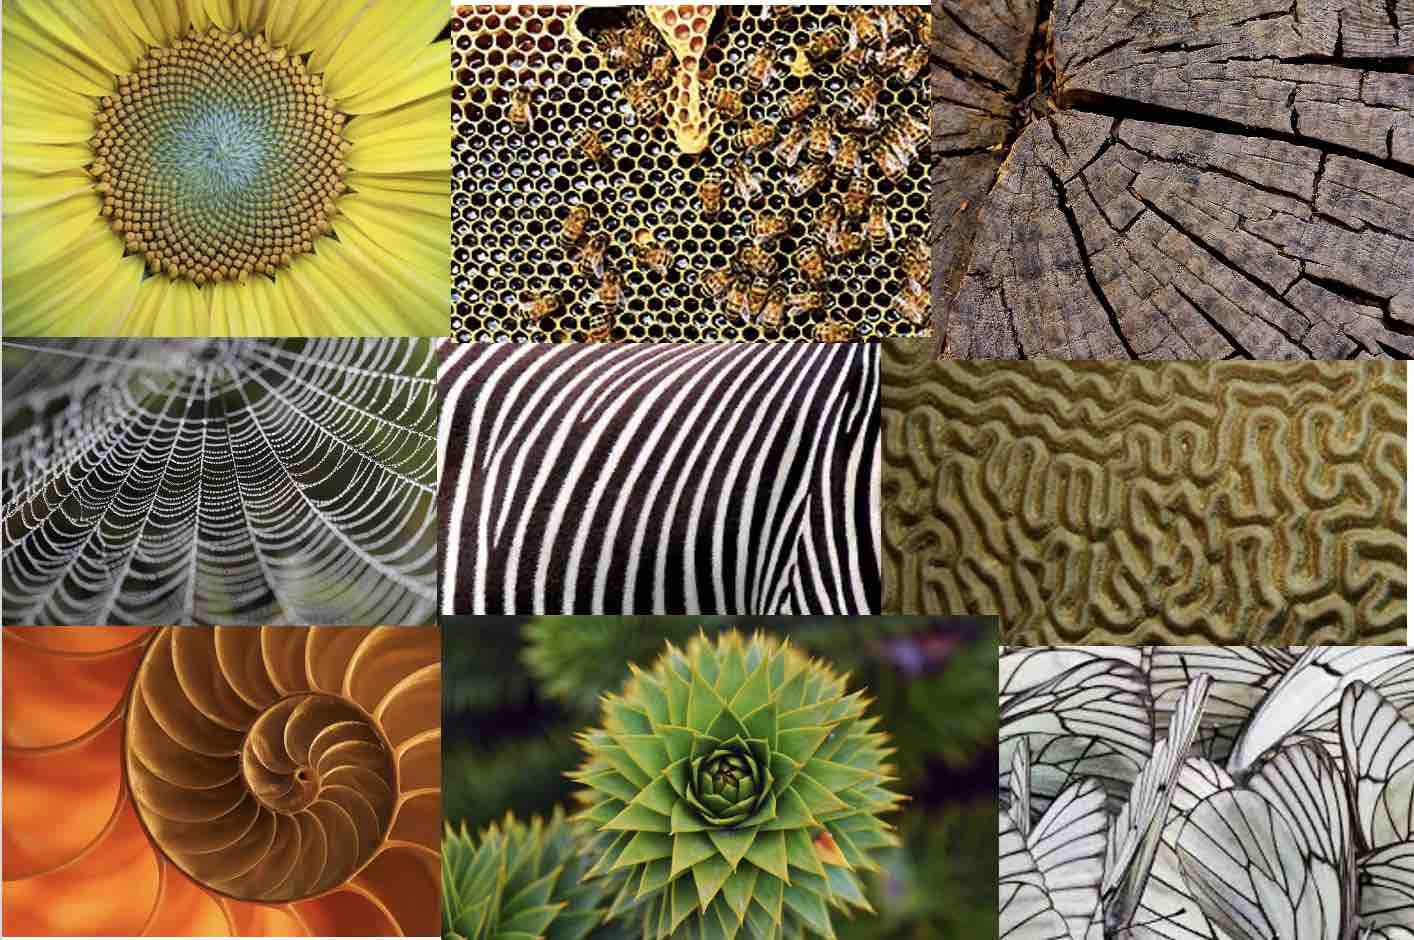

# Turing patterns

While there are many mechanisms and models of pattern formation, we will focus on **Turing patterns** today.

A bit of history first:

Turing patterns were formulated by Alan Turing. You may know the name Alan Turing from a different field. He was a mathematician and computer scientist who is often considered the father of theoretical computer science because he invented the concepts of algorithms and computation in his "Turing machine", which is often considered a model of our modern day computers! What you may not know is he is also one of the founding fathers of biophysics! He wrote a paper in 1952 called  "The Chemical Basis of Morphogenesis" in which he detailed a model to describe how a simple set of chemical reactions could lead to the formation of stripes, spots and other patterns we see on animals!

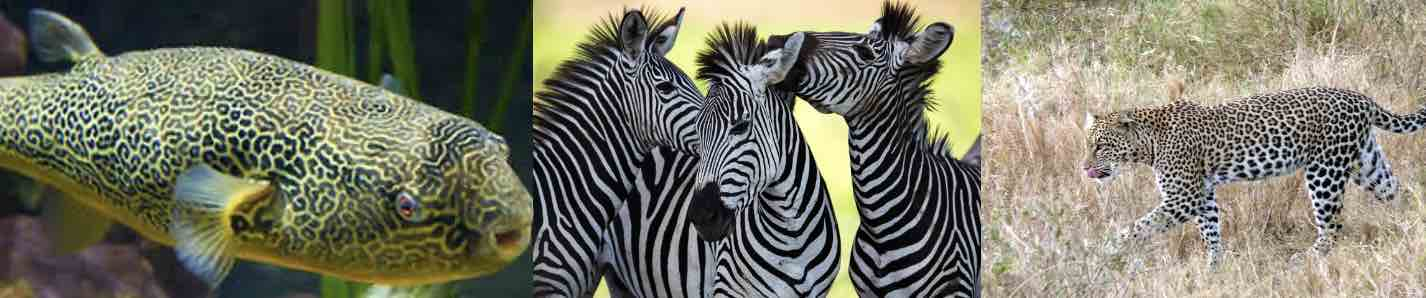

In his paper, Turing argued that all of the above patterns can be formed if you have two chemicals that are able to chemically **react** to one another while they **diffuse** through space. That's why we call these coupled equations **reaction-diffusion equations**. (A quick note on terminology: reaction-diffusion equations result in Turing patterns like the ones you see on zebras, leopards, and fish).

You might know that chemicals react with each other if you have taken chemistry. Chemical reactions in this subject are usually written something like $A+B \rightarrow C$. But the genius of Turing's idea was that if you let chemicals move through space (through diffusion) their spreading through space as they chemical interact can lead to really cool looking patterns!

Let's take a look at these reaction-diffusion equations.

### Reaction-Diffusion Equations

Reaction-Diffusion equations are a class of partial differential equations whose dynamics are governed by two terms: a diffusion part and a reaction part. Just like our predator-prey models had two terms for each the prey and the predator, reaction-diffusion equations describe the time evolution of both chemical concentrations (let's call them a and b, where a is the concentration of chemical A and b is the concentration of chemical B) where there is a diffusion term and a reaction term! The diffusion term looks like a regular diffusion equation that you have already learned. The reaction term we will leave generic for now and just write that it is dependent on both the concentration of chemical a and chemical b.

$\frac{\partial a(x,t)}{\partial t} = D_a \frac{\partial^2 a(x,t)}{\partial x^2} + R_a(a(x,t),b(x,t)$

$\frac{\partial b(x,t)}{\partial t} = D_b \frac{\partial^2 b(x,t)}{\partial x^2} + R_b(a(x,t),b(x,t)$

Notice that there are two diffusion constants, $D_a$ is the diffusion constant for chemical A and $D_b$ is the diffusion constant for chemical B. Similarly, there are two reaction functions (that we have not yet defined), $R_a$ is the reaction function for chemical A and $R_b$ is the reaction function for chemical B. Finally, notice that the concentrations of each chemical depend on the position x in space and time, t.

The important thing to remember for these reaction-diffusion equations is that chemical A is called the "Activator" and it activates (or stimulates production of) itself and chemical B. Chemical B is called the "Inhibitor" and it inhibits (or slows down) the production of Chemical A. (Kind of like a predator-prey relationship!) The more activator there is, the more activator is made. But if there is an inhibitor, it will quickly inhibit the activator while the activator is activating more inhibitors.

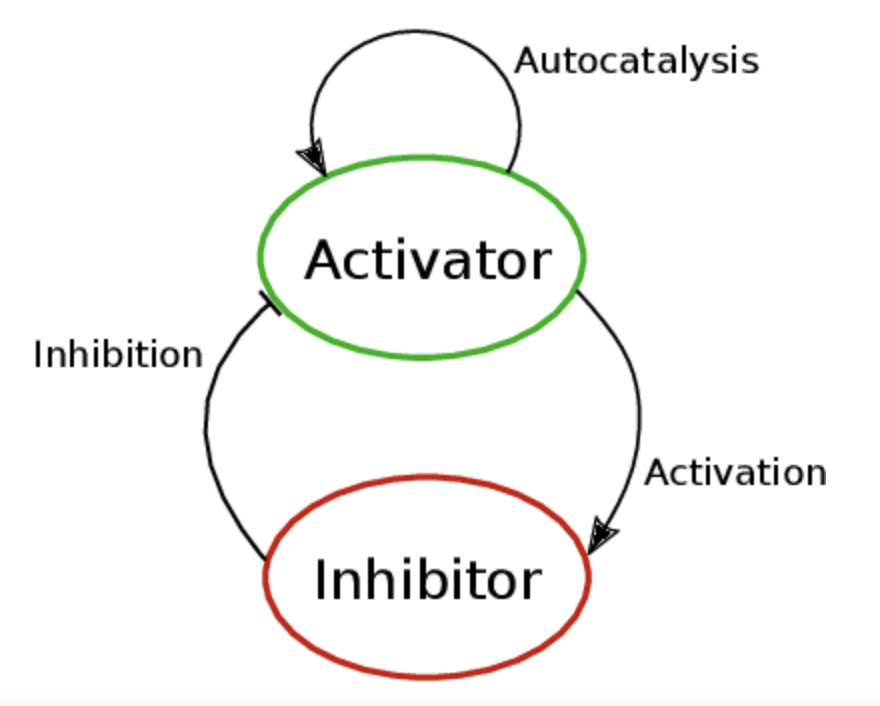

The major difference between the predator-prey relationship and these reaction-diffusion models is that the activator and inhibitor can also **diffuse** or move through space. The balance between diffusion through tissue and a competition between the activators and inhibitors leads to patterns in space. Lastly, the activator also activates pigment production, so when we simulate these reaction-diffusion equations, you can think of the patterns of chemical A as the literal location of dark pigments you'd see on a leopard's, zebra's, or fish's skin!! By changing the variables like how fast these chemicals diffuse or how strong the activator activates or the inhibitor inhibits or the initial conditions (how much of the activator or inhibitor you have) or the shape/size of tissue, you can change the types of patterns you get!

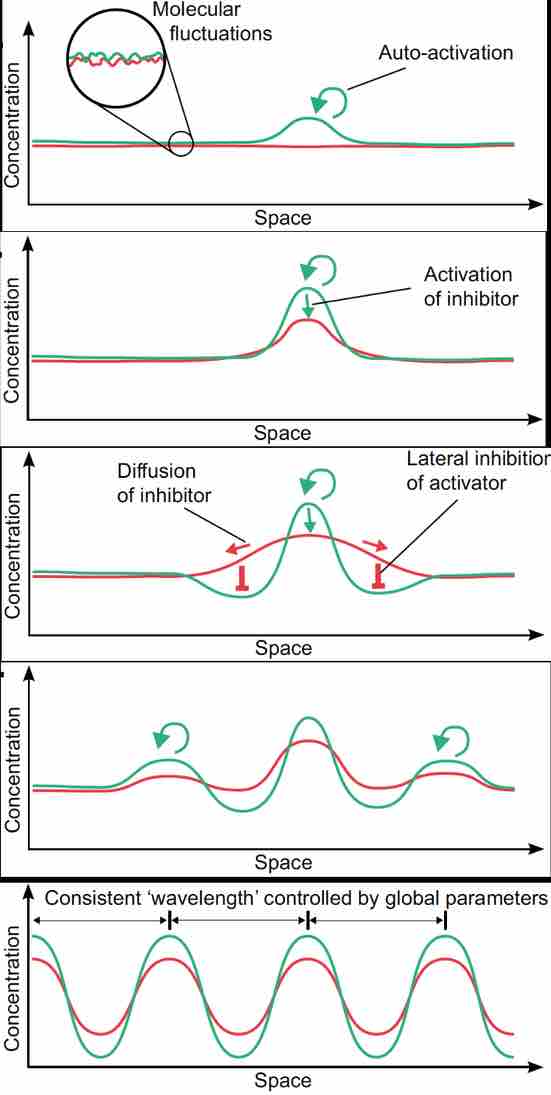

### Diffusion

Let's first talk about the diffusion term. We already learned last week that diffusion is the process in which something (molecules, organisms, dye) moves from areas of high concentration to low concentration by spreading out in space. Last week, I just showed you what various solutions to the diffusion equation looked like as t, time, increases. Today, we will actually simulate the diffusion equations (PDEs) themselves using a numerical method called the explicit finite-difference method. If you took the preceeding python course, you would have seen this method in Modules 4 and 11! Given that that was pretty far into the course, I'm going to assume you haven't necessarily seen this method and we will learn it today since it is a useful computational tool for you all to know.

### How to solve PDEs using the finite-difference method

First, we need to approximate both our time derivative on the left side ($\frac{\partial a}{\partial t}$) of the diffusion equation and our spatial second derivative on the right side of the diffusion equation ($\frac{\partial^2 a}{\partial x^2}$) . We do this by approximating derivatives with **finite-differences**.

Let's recall the definition of a derivative:

$\frac{df(x)}{dx} ≡ \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$

Your computer cannot take this limit as $h$ approaches $0$, therefore, we have to write the derivative in a different way that is an approximation that your computer can compute:

$\frac{df(x)}{dx} ≈ \frac{f(x+h)-f(x)}{h}$, where $dt$ is very small, but not $0$.

There are several forms one can use for these finite-difference forms. This one is called the forward difference.

Now let's look at second derivatives. The definition of a second derivative that you learned in calculus (in central-difference form) is:

$f''(x)=\frac{f'(x+h/2)-f'(x-h/2)}{h}$

Now, we'll use our write the two derivatives as the finite-difference central-difference form about the points $x ± h/2$ (generically, that formula is $f'(x) \approx \frac{f(x+h/2)-f(x-h/2)}{h}$. Applying this to the above derivatives:

$f'(x+h/2) \approx \frac{f(x+h)-f(x)}{h}$ and $f'(x-h/2) \approx \frac{f(x)-f(x-h)}{h}$

Now we plug these finite-difference equations into our second derivative equation above, do a little bit of algebra and get:

$f''(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$



### Applying the finite-difference method to the diffusion equation

Instead of using a very small number $h$, we'll just use $dt$ or $dx^2$ where applicable. It is the same idea, we are just make the denominator a small, but non-zero value.

Reminding ourselves that the diffusion equation is:
$\frac{\partial a}{\partial t} = D \frac{\partial^2 a}{\partial x^2}$

Let's write down the finite-difference for the LHS of the diffusion equation:

$\frac{\partial a}{\partial t} ≈ \frac{1}{dt} (a_{x,t+1}-a_{x,t})$

And the finite-difference equation for the RHS of the diffusion equation is:

$\frac{\partial^2 a}{\partial x^2} ≈ \frac{1}{dx^2} (a_{x+1,t}+a_{x-1,t}-2a_{x,t})$

Putting everything together for the diffusion equation we get:

$\frac{1}{dt} (a_{x,t+1}-a_{x,t}) = D*[\frac{1}{dx^2} (a_{x+1,t}+a_{x-1,t}-2a_{x,t})]$

Moving $a_{x,t}$ and $dt$ to the other side we get:

$a_{x,t+1} = a_{x,t}+ dt\big( \frac{D}{dx^2} (a_{x+1,t}+a_{x-1,t}-2a_{x,t}) \big)$

or more simply, $a_{x,t+1} = a_{x,t}+ dt\big( D \frac{\partial^2 a}{\partial x^2} \big)$

### Expanding the Laplacian to 2-dimensions

While it is simple and tangible to do things in 1D, patterns in 1D really aren't that exciting. So, let's move up a dimension and write out the finite-difference Laplacian in 2D and apply it to a 2D diffusion equation.

The 2D Laplacian looks like: $\frac{\partial^2 a}{\partial x^2} + \frac{\partial^2 a}{\partial y^2} = 0$

If we now write each of these terms as the finite-difference Laplacian in 1D we determined above, we get:

$\frac{1}{dx^2} (a_{x+1,t}+a_{x-1,t}-2a_{x,t}) + \frac{1}{dy^2} (a_{y+1,t}+a_{y-1,t}-2a_{y,t}) = 0$

Assume that $dx$ and $dy$ are small enough and that $dx^2 = dy^2$

$\frac{\partial^2 a}{\partial x^2} + \frac{\partial^2 a}{\partial y^2} \approx \frac{a_{x+1,y}+a_{x-1,y}+a_{x,y+1}+a_{x,y-1}-4a_{x,y}}{dx^2}$

(Note: I've dropped the t, but it's still there implicitly!)

### The Reaction model

Until now I haven't mentioned anything more about the exact reaction model we'll use for the second term in the reaction-diffusion equations.

$\frac{\partial a(x,t)}{\partial t} = D_a \frac{\partial^2 a(x,t)}{\partial x^2} + R_a(a(x,t),b(x,t)$

$\frac{\partial b(x,t)}{\partial t} = D_b \frac{\partial^2 b(x,t)}{\partial x^2} + R_b(a(x,t),b(x,t)$

There are many different reaction models one can use. For today, we'll use one that is often used in the literature called the Fitzhugh-Nagumo model because it has been shown to have a rich phase space of possible patterns including spotted, striped, and hexagonal patterns!

The Fitzhugh-Nagumo model is:


$R_a(a(x,t),b(x,t)) = a - a^3 - b + k$

$R_b(a(x,t),b(x,t)) = \beta(a-b)$

where k is some arbitrary term we can add.

We discussed activators and inhibitors earlier in the class. Based on that discussion, what do these reaction equations tell you about the behavior of the concentrations of chemicals a and b (the activator and the inhibitor)?





The activator activates both itself and the inhibitor ($+a$), the inhibitor inhibits both the activator and inhibitor ($-b$). The activator also slightly inhibits itself but to a much smaller degree ($-a^3$).

### Full reaction-diffusion equation

Let's put everything together:

$\frac{\partial a(x,t)}{\partial t} = D_a \frac{\partial^2 a(x,t)}{\partial x^2} + a - a^3 - b + k$

$\frac{\partial b(x,t)}{\partial t} = D_b \frac{\partial^2 b(x,t)}{\partial x^2} + \beta(a-b)$

Ok, we're now just about ready to start simulating. We will need to use the full reaction-diffusion equation, the finite-difference equations for the derivatives and the laplacians. Let's get started!


First, import the matplotlib and numpy packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Next, define and initialize everything.

Define the three model parameters:

$D_a = 1$, $D_b = 100$, $k=-0.005$, and $\beta = 10$. Remember $A$ and $B$ are variables.

Let's also discretize time and space by creating a 2D square grid (discretize means that we'll compute everything on a 2D grid instead of computing continuous functions). To do this, set a variable size, which represents one side of the grid, to 100, the space step size (you can call it dx) to $1$, the total time to 30.0, a time step to 0.001, and the number of iterations, n, should be defined an integer (think about what it would be formulaically).

Finally, intitialize the concentration variables with a uniform noise between 0 and 1 on the vertices of your 2D square grid.

In [ ]:
D_a = 1
D_b = 100
k = -0.005
beta = 10

size = 100  # size of the 2D grid
dx = 1.   # space step
T = 30.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

a = np.random.rand(size, size)
b = np.random.rand(size, size)

Next, let's define a function that computes (and returns) the value of the 2D laplacian:

$\frac{\partial^2 a}{\partial x^2} + \frac{\partial^2 a}{\partial y^2} \approx \frac{a_{x+1,y}+a_{x-1,y}+a_{x,y+1}+a_{x,y-1}-4a_{x,y}}{dx^2}$

Your function argument should be a concentration variable.

You are computing the laplacian on a grid, so a helpful visual for each term in the finite-difference equation above is:

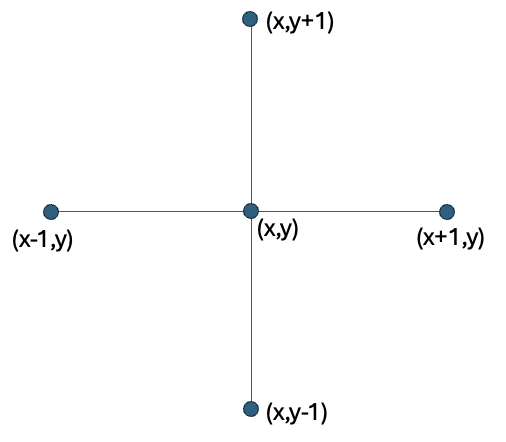

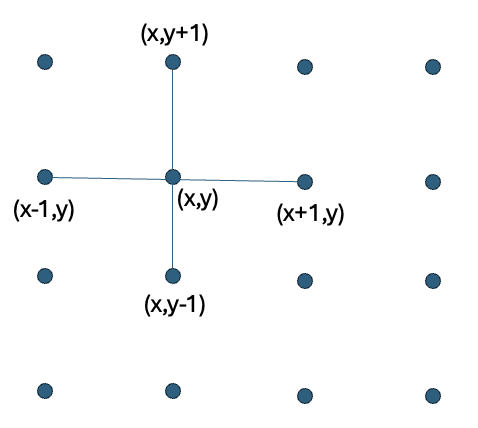

### Periodic boundary conditions

Periodic boundary conditions are a set of boundary conditions which are often chosen for approximating a large (infinite) system by using a small part called a unit cell. The large systems approximated by periodic boundary conditions consist of an infinite number of unit cells. In computer simulations, one of these is the original simulation box, and others are copies called images. During the simulation, only the properties of the original simulation box need to be recorded and propagated.

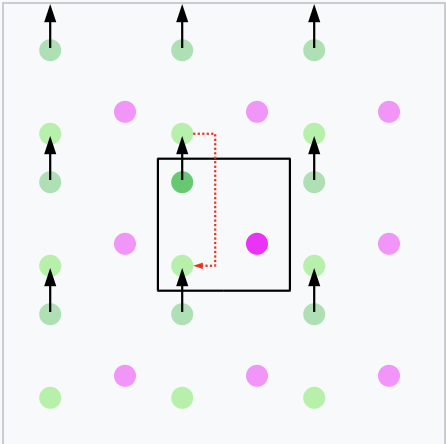

The easiest way to implement boundary conditions in python is through something called the "roll" function: https://www.geeksforgeeks.org/numpy-roll-python/.

In [ ]:
def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

Now define a function that displays the results of the concentration on the 2D square grid using imshow. Choose your favorite colormap from here: https://matplotlib.org/stable/users/explain/colors/colormaps.html. Also, because we are working towards putting together a timelapse of results, add "set_axis_off()" at the end of your function so that the grid of time sequences is neat.

In [ ]:
def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.plasma)
    ax.set_axis_off()

Ok! We're now ready to write our main piece of code! Write a piece of code that computes and plots the finite-difference version of the reaction-diffusion equations given above. Just as a reminder, these are the reaction-diffusion equations we're working with:


$\frac{\partial a(x,t)}{\partial t} = D_a \frac{\partial^2 a(x,t)}{\partial x^2} + a - a^3 - b + k$

$\frac{\partial b(x,t)}{\partial t} = D_b \frac{\partial^2 b(x,t)}{\partial x^2} + \beta(a-b)$

Now, just like we did above for the 1D laplacian, please write a 2D version in terms of the finite-difference equations.

$\frac{\partial a(x,y,t)}{\partial t} = D_a \Delta a(x,t) + a - a^3 - b + k$

$\frac{\partial b(x,y,t)}{\partial t} = D_b \Delta b(x,t) + \beta(a-b)$

Write the code that will compute the concentrations of the activator and inhibitor and will plot them. Plot 9 time points from the start to the end of the simulation.

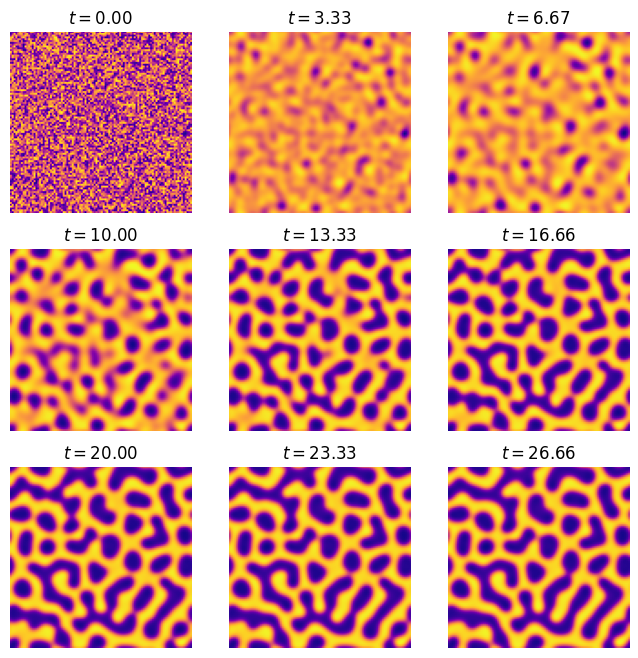

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of a and b.
    delta_a = laplacian(a)
    delta_b = laplacian(b)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    bc = b[:,:]
    # We update the variables.
    a[:,:], b[:,:] = \
        ac + dt * (D_a * delta_a + ac - ac**3 - bc + k),\
        bc + dt * (D_b * delta_b + beta*(ac - bc))


    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

### Are these really turing patterns?

While it is very tempting to look at the results of a simulation and assume that because they look like the stripes on a zebra or the splotches of a giraffe that means that the theory or model is correct, that would be the wrong assumption to make.

What do you think needs to be checked in order to say with more confidence that the reaction-diffusion equation is an appropriate model for an animals pigmentation pattern?

You would need to actually identify chemically the existence of molecules that act like the activator and inhibitor

# Linear stability analysis

The next step in this type of analysis would to understand for what parameter values will you get a stable, patterned solution. For this, we need to learn about linear stability analysis, which we don't have time to do. But this would be an excellent final project to pursue :)

